In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Normalizing the numerical data 
scaled_wine = scale(wine)

In [5]:
scaled_wine

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA

In [6]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(scaled_wine)

In [7]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102])

In [9]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71])

In [10]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685]])

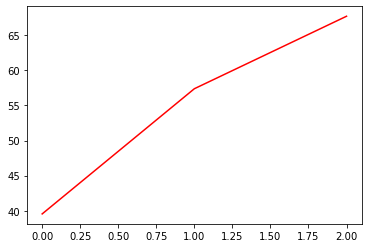

In [11]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

C:\Users\Debanjali\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


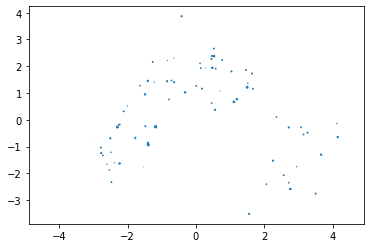

In [13]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y,z)

In [32]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine['Type']], axis = 1)

In [33]:
finalDf.head()

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

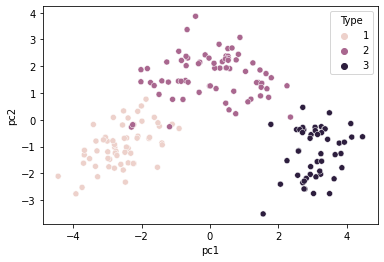

In [34]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

From the above plot we can approximately figure 3 clusters.

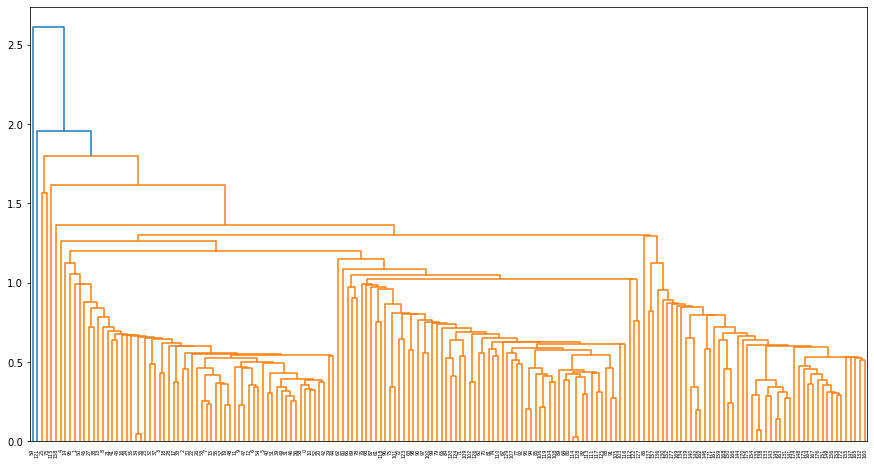

In [36]:
# create dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize = (15,8))
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='single'))

In [39]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [40]:
y_hc1 = hc1.fit_predict(finalDf)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [41]:
wine_new = wine
wine_new['cluster'] = Clusters
wine.groupby('cluster').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_kmeans
cluster,,,,,,,,,,,,,,,,
0,1.9375,13.012386,2.345909,2.36733,19.494318,99.698864,2.291875,2.020227,0.361705,1.595966,5.070398,0.95708,2.610057,749.784091,0.005682,0.630682
1,2.0000,12.370000,0.940000,1.36000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.05000,1.820000,520.000000,0.000000,1.000000
2,2.0000,11.560000,2.050000,3.23000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.93000,3.690000,465.000000,0.000000,1.000000


In [42]:
from sklearn.cluster import KMeans

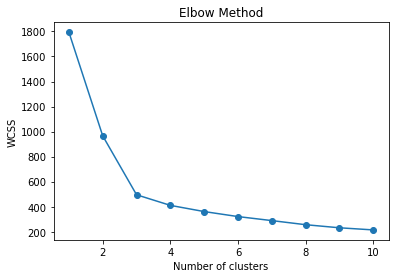

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))    
plt.plot(range(1, 11), wcss,marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
#Build Cluster algorithm
k=3
clusters_new = KMeans(k, random_state=42)
clusters_new.fit(finalDf)
#Assign clusters to the data set
wine_new['cluster_kmeans'] = clusters_new.labels_

In [45]:
wine_new.groupby('cluster_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_kmeans,cluster
cluster_kmeans,,,,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.000000,0.000000,0.000000
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,0.016129,1.000000,0.032258
2,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955,0.000000,0.761194,0.014925


Here using PCA we are getting 3 clusters

## Hierarchical Clustering on original data

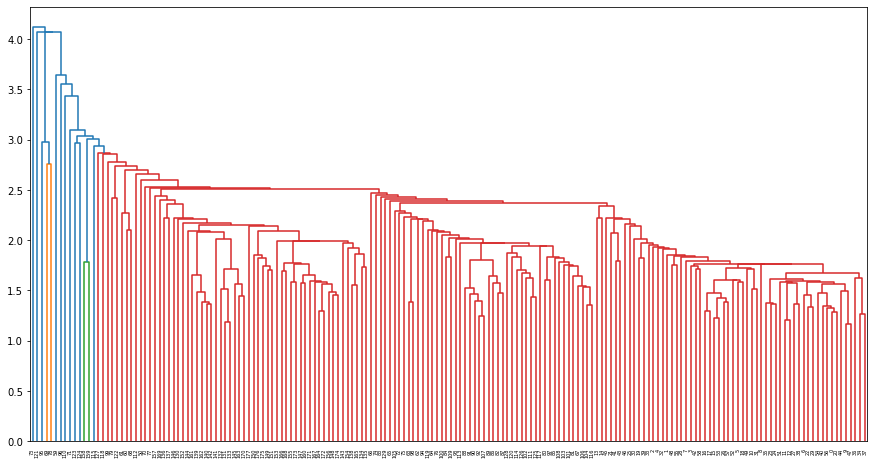

In [17]:
# create dendrogram
plt.figure(figsize = (15,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_wine, method='single'))

In [46]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [47]:
y_hc = hc.fit_predict(scaled_wine)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [48]:
wine['h_clusterid'] = Clusters
wine.groupby('h_clusterid').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_kmeans,cluster,cluster_kmeans
h_clusterid,,,,,,,,,,,,,,,,,
0,1.9375,13.008864,2.341761,2.360284,19.384091,99.409091,2.284375,2.007045,0.362102,1.587216,5.062443,0.955602,2.600511,747.142045,0.630682,0.005682,1.102273
1,2.0000,12.990000,1.670000,2.600000,30.000000,139.000000,3.300000,2.890000,0.210000,1.960000,3.350000,1.310000,3.500000,985.000000,1.000000,0.000000,1.000000
2,2.0000,11.560000,2.050000,3.230000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.930000,3.690000,465.000000,1.000000,2.000000,1.000000


## KMeans clustering on original data

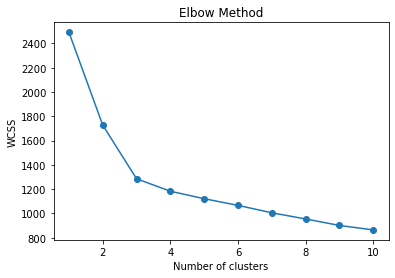

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))    
plt.plot(range(1, 11), wcss,marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Build Cluster algorithm
k=3
clusters_new = KMeans(k, random_state=42)
clusters_new.fit(scaled_wine)
#Assign clusters to the data set
wine['clusterid_kmeans'] = clusters_new.labels_

In [50]:
wine.groupby('clusterid_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,cluster,cluster_kmeans
clusterid_kmeans,,,,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.000000,0.000000,0.000000
1,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.016393,0.000000,1.000000
2,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235,0.029412,0.044118,1.985294


From both the hierarchical and Kmeans clustering on the original data we find 3 clusters.
Therefore,we can see using PCA also gives the same number of clusters .